# Lecture 15 - Nonlinear regression

One of the most important applications of the optimization of nonlinear equations is fitting data to a model function.

Called [non-linear least squares][1] or [non-linear regression][2], the objective function we wish to minimize the value of, is one that matches data to a model function, with respect to the model parameters.

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width=300/>

Consider a set of $m$ data points
$$\{x_i,y_i\},\quad i=1\ldots m$$
and an analytical function meant to describe the underlying trend of those points with a set of $n$ paramters $a_j$,
$$
f(x;\vec{a}),\quad \vec{a}=\{a_1,\ldots a_n\}
$$
We want to find the best set of paramters $a_j$ such that the curve best fits the given data in the least squares sense, that is, the sum of squares,
$$ 
S(\vec{a})=\sum_{i=1}^{m}r_{i}^{2}
$$
is minimized. In this equation the *residuals* (in-sample prediction errors) $r_i$ are given by
$$
r_{i}=y_{i}-f(x_{i};{\vec{a}})
$$

Working from the last lecture notes, we see that we can use Newton's method. The idea is to expand $S(\vec{a})$ in a Taylor series near a good starting guess of the paramters,
$$
S(\vec{a}) = S(\vec{a}^*) + \pmb{J}\cdot(\vec{a}-\vec{a}^*)+\ldots
$$
where $\pmb{J}$ is the Jacobian matrix
$$
J_{j} = \left.\frac{\partial S}{\partial a_j}\right\rvert_{\vec{a}^*}\ .
$$
Note that in this case, we only have one function of $n$ paramters to minimize, thus the Jacobian has dimensions of $1\times n$.
To adjust the paramters by a step $\Delta\vec{a}=\vec{a}^*-\vec{a}$, we have
$$
\pmb{J}\cdot\Delta\vec{a} = S
$$
Following an iterative procedure based on this method, we can arrive at a set of parameters $\vec{a}$ that minimizes $S$.

----

We can also rewrite the method in terms of a Jacobian of the residuals, rather than the Jacobian of the total objective function.

The minimum of $S$ occurs when the gradient is zero. Sicne there are $n$ parameters, there are $n$ gradient equations:
$$
\frac{\partial S}{\partial a_j} = 2\sum_{i=1}^{m}r_i\frac{\partial r_i}{\partial a_j} = 0
$$

First, we expand the model function in a Taylor series near the initial guess of $\vec{a}^*$;
$$
f(x_i;\vec{a}) = f(x_i;\vec{a}^*) + \pmb{J}\cdot(\vec{a}-\vec{a}^*)+\ldots
$$

Next, because $f_i=y_i-r_i$, we define the *residuals* Jacobian $\pmb{J}$ as a $m\times n$ matrix
$$
J_{ij}=\left.\frac{\partial f_i}{\partial a_j}\right\rvert_{\vec{a}^*}=-\left.\frac{\partial r_i}{\partial a_j}\right\rvert_{\vec{a}^*}
$$

Defined this way, then we have
$$
\begin{array}{}
r_i &=& y_i-f(x_i;\vec{a}) \\
&=& \left(y_i-f(x_i;\vec{a}^*)\right) + \left(f(x_i;\vec{a}^*)-f(x_i;\vec{a})\right) \\
&\approx& r_i^* - \pmb{J}\cdot(\vec{a}-\vec{a}^*)
\end{array}
$$

Substituting these last two results into the $n$ gradient equations, we have:
$$
0=-2\sum_{i=1}^{m}
\left(r_i^*-\pmb{J}\cdot\Delta\vec{a}\right)
J_{ij} =
-2\sum_{i=1}^{m}
\left(r_i^*-\sum_{k=1}^{n}J_{ik}\Delta a_k\right)
J_{ij}
$$

After some algebra, this becomes
$$
\left(\pmb{J}^T\pmb{J}\right)\Delta\vec{a} = \pmb{J}^T\vec{r}^*
$$
where 
$$
J_{ij}=-\left.\frac{\partial r_i}{\partial a_j}\right\rvert_{\vec{a}^*}
$$
and
$$
r_i^* = y_i - f(x_i;\vec{a}^*) 
$$

It can be solved for $\Delta\vec{a}$ because it is in the form of a system of linear equations $\pmb{A}\vec{x}=\vec{b}$. 

----

Fitting data is no good without estimating the uncertainty in the paramters.

Becasue we are minimizing $S$, we want to know the sensitivity of $S$ to each parameter $a_j$. Visually speaking, we wish to know how shallow or steep the function $S(\vec{a})$ is around the [global minimum.][3] Essentially, we need to know the cuvature of the function $S$ around it's minimum.

*Cuvature* is the second derivative of a function. The [Hessian matrix][4] is a square matrix of second-order partial derivatives of a scalar-valued function, 
$$
H_{ij} = \frac{\partial^2 f}{\partial x_i\partial x_j}
$$
We need the Hessian of the residuals. It's a lot of work to compute the Hessian analytically, but when the residuals are small, we can approximate it with the Jacobian of the residuals,
$$
\begin{array}{}
H_{ij} &=& \frac{\partial^2 r}{\partial a_i\partial a_j} \approx  \frac{\partial r}{\partial a_i}\frac{\partial r}{\partial a_j} = \sum_{k=1}^{n}J_{ki}J_{kj} \\
\pmb{H} &\approx& \pmb{J}^T\pmb{J}
\end{array}
$$

In probability theory and statistics, a [covariance matrix][5] $\pmb{C}$ is a square matrix giving the covariance between each pair of elements of a given random vector. In the matrix diagonal there are variances, i.e., the covariance of each element with itself. The uncertainty of our fitted parameters, $a_j\pm\sigma_{j}$ is given by
$$\sigma_{j} = \sqrt{C_{jj}}$$

We can uset the fact that for Gaussian random variables, $\pmb{C} = \pmb{H}^{-1} \approx \left(\pmb{J}^T\pmb{J}\right)^{-1}$

So since we have the Jacobian of the residuals, we can find the uncertainty (variance) of the fit paramters from the diagonal elements fo the $m\times m$ matrix
$$
\sigma_j \approx \sqrt{\left[\left(\pmb{J}^T\pmb{J}\right)^{-1}\right]_{jj}}
$$

[1]: https://en.wikipedia.org/wiki/Non-linear_least_squares
[2]: https://en.wikipedia.org/wiki/Nonlinear_regression
[3]: http://scipy-lectures.org/advanced/mathematical_optimization/#gradient-based-methods
[4]: https://en.wikipedia.org/wiki/Hessian_matrix
[5]: https://en.wikipedia.org/wiki/Covariance_matrix

In [9]:
%matplotlib inline
import numpy
import scipy.optimize
import scipy.stats
import scipy.misc
import matplotlib.pyplot as plot

#### Make some dummy data

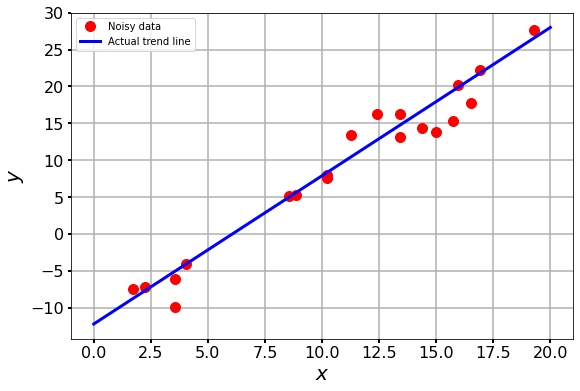

In [10]:
# -- Let's make this more interesting:
# -- I don't want the independant data to be uniformly spaced,
# -- so I will select a number of data points from a defined range of values.
xmin = 0.
xmax = 20.
n    = 20
x    = numpy.random.random((n))*(xmax-xmin) + xmin
# --
# -- The exact paramters of the model are:
a0 = 2.01  #slope
a1 = -12.2 #intercept
# --
# -- Here I make the data to be fit: y = ax + b + noise
# -- The level of noise in the dependant variable y will be taken from
# -- a Gaussian distribution of mean 0 and sigma 1.1
sigma = 2.1
mu    = 0.0
y     = a0*x + a1 + sigma * numpy.random.randn((n)) + mu

# -- I want to also graph the *true* line, so I make some data to plot:
xplot = numpy.linspace(xmin,xmax,n)
ytrue = a0*xplot+a1


plot.figure(figsize=(9,6))
plot.tick_params(axis='both', which='major', labelsize=16, labelcolor="black", width=2)
plot.xlabel(r"$x$", fontsize=20)
plot.ylabel(r"$y$", fontsize=20)
plot.plot(x,y,'r.',markersize=20, label="Noisy data")
plot.plot(xplot,ytrue,'b-',linewidth=3, label="Actual trend line")
plot.legend()
plot.grid(True,linewidth=1.5,axis="both")
plot.show()
plot.close()

#### Example 1 : scipy.optimize.minimize

Non-linear least-sqaures regression with [`scipy.optimize.minimize`][1] local multivariate optimization.

Here we will minimize the objective function $S$ using general mimization techniques. This means we need to supply; 1) the Jacobian of $S$ for the minimization and 2) seperately provide the Jacobian of the residuals for the estimation of fit uncertainty. This method works best if you want to define your own cost-function to minimize, but is too much work for routine data fitting.

[1]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

scipy.optimize.minimize : Nelder-Mead
Message                 : Optimization terminated successfully.
The fit slope is        : 1.9821+/-0.0424
The fit intercept is    : -12.4435+/-0.5121


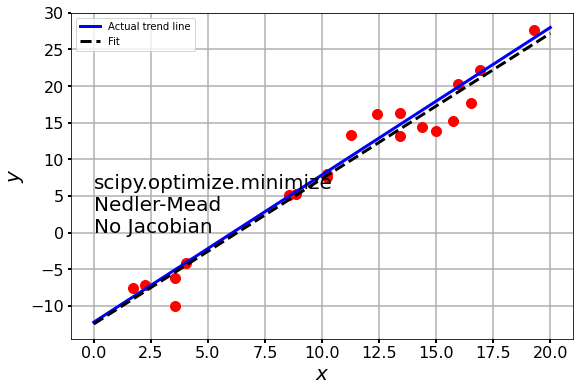

[2712.17211767  258.07411715]
[2711.93474009  258.0564025 ]
[-5.26027948 55.28172868]
[-5.26018027 55.28172979]
[-5.26027948 55.28172868]
[-5.30385786 55.27758202]
[-1.39593967e-06 -1.65269517e-07]
[-1.39581779e-06 -1.65260412e-07]
[-1.39593967e-06 -1.65269517e-07]
[-1.39593910e-06 -1.65269457e-07]
[-1.39593967e-06 -1.65269517e-07]
[-1.39611893e-06 -1.65275120e-07]
[-1.39593967e-06 -1.65269517e-07]
[-1.39610810e-06 -1.65279353e-07]
[-1.39593967e-06 -1.65269517e-07]
[-1.39602983e-06 -1.65275619e-07]
[-1.39593967e-06 -1.65269517e-07]
[-1.3959812e-06 -1.6527248e-07]
[-1.39593967e-06 -1.65269517e-07]
[-1.39595862e-06 -1.65270913e-07]
[-1.39593967e-06 -1.65269517e-07]
[-1.39594903e-06 -1.65270214e-07]
[-1.39593967e-06 -1.65269517e-07]
[-1.39594521e-06 -1.65269929e-07]
[-1.39593967e-06 -1.65269517e-07]
[-1.39594461e-06 -1.65269899e-07]
[-1.39593967e-06 -1.65269517e-07]
[-1.39594835e-06 -1.65270214e-07]
[-1.39593967e-06 -1.65269517e-07]
[-1.39595658e-06 -1.65271018e-07]
[-1.39593967e-06 -1.65

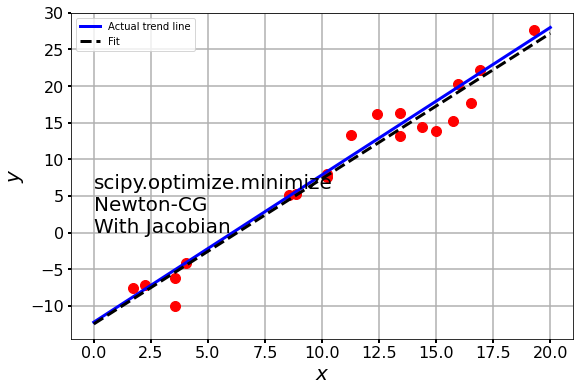

In [11]:
# ----------------------------------------------------------
# -- The objective function S is in this python function.
# -- a                : Paramters that are being adjusted to fit
# -- args             : The data we are fitting 
# -- residual_squared : THINK ABOUT IT: What shape is this array?
# -- THINK ABOUT IT: What is the shape of the data being returned?
# ----------------------------------------------------------
def f_model(a, *args) :
    xdata,ydata = args
    slope,intercept = a
    residual_squared = (slope*xdata + intercept - ydata)**2
    return numpy.sum(residual_squared)
# ----------------------------------------------------------
# -- The Jacobian of the objective function S with respect
# -- the parameters a.
# -- There are two parameters, so J is 1x2
# ----------------------------------------------------------
def J_model(a, *args) :
    xdata, ydata = args
    slope, intercept = a
    residual = (slope*xdata + intercept - ydata)
    J0 = residual * xdata
    J1 = residual
    J0 = 2.0*numpy.sum(J0)
    J1 = 2.0*numpy.sum(J1)
    thing = numpy.array([J0,J1])
    print(thing)
    return thing
# ----------------------------------------------------------
# -- The Jacobian of the residuals r with respect to the parameters a.
# -- a        : Paramters that are being adjusted to fit
# -- args     : The data we are fitting
# -- There are two parameters, and n data, so J is nx2  after transposeing.
# ----------------------------------------------------------    
def J_model_2(a, *args) :
    xdata,ydata = args
    slope,intercept = a
    J0 = xdata
    J1 = numpy.ones((xdata.size))
    return numpy.array([J0,J1]).T
# ----------------------------------------------------------    

# ----------------------------------------------------------    
# -- Use Nelder-Mead without the Jacobian
# --
initial_guess = numpy.array([1.9,-5.1])
res = scipy.optimize.minimize(f_model,
                              initial_guess,
                              args=(x,y),
                              method="Nelder-Mead")
jac = J_model_2(res.x,*(x,y))
hessian = numpy.dot(jac.T, jac)
covariance = numpy.abs(numpy.linalg.inv(hessian))
var = numpy.sqrt(numpy.diagonal(covariance))
print("scipy.optimize.minimize : Nelder-Mead")
print(f"Message                 : {res.message}")
print(f"The fit slope is        : {res.x[0]:3.4f}+/-{var[0]:3.4f}")
print(f"The fit intercept is    : {res.x[1]:3.4f}+/-{var[1]:3.4f}")
# -- PLOT IT!
yplot  = res.x[0]*xplot+res.x[1]
plot.figure(figsize=(9,6))
plot.tick_params(axis='both', which='major', labelsize=16, labelcolor="black", width=2)
plot.xlabel(r"$x$", fontsize=20)
plot.ylabel(r"$y$", fontsize=20)
plot.plot(x,    y,    'r.',markersize=20)
plot.plot(xplot,ytrue,'b-',linewidth=3, label="Actual trend line")
plot.plot(xplot,yplot,'k--',linewidth=3, label="Fit")
plot.grid(True,linewidth=1.5,axis="both")
plot.annotate('scipy.optimize.minimize\nNedler-Mead\nNo Jacobian', xy=(0,0), xytext=(0,0),fontsize=20)
plot.legend()
plot.show()
plot.close()
# ----------------------------------------------------------    


# ----------------------------------------------------------    
# -- Use Newton-CG with the Jacobian
# --
initial_guess = numpy.array([1.9,-5.1])
res = scipy.optimize.minimize(
    f_model,
    initial_guess,
    args=(x,y),
    jac=J_model,
    method="Newton-CG"
)
jac = J_model_2(res.x,*(x,y))
hessian = numpy.dot(jac.T, jac)
covariance = numpy.abs(numpy.linalg.inv(hessian))
var = numpy.sqrt(numpy.diagonal(covariance))
print("scipy.optimize.minimize : Newton-CG")
print(f"Message                 : {res.message}")
print(f"The fit slope is        : {res.x[0]:3.4f}+/-{var[0]:3.4f}")
print(f"The fit intercept is    : {res.x[1]:3.4f}+/-{var[1]:3.4f}")
# -- PLOT IT!
yplot  = res.x[0]*xplot+res.x[1]
plot.figure(figsize=(9,6))
plot.tick_params(axis='both', which='major', labelsize=16, labelcolor="black", width=2)
plot.xlabel(r"$x$", fontsize=20)
plot.ylabel(r"$y$", fontsize=20)
plot.plot(x,     y,     'r.',markersize=20)
plot.plot(xplot, ytrue, 'b-',linewidth=3, label="Actual trend line")
plot.plot(xplot, yplot, 'k--',linewidth=3, label="Fit")
plot.grid(True,linewidth=1.5,axis="both")
plot.annotate('scipy.optimize.minimize\nNewton-CG\nWith Jacobian', xy=(0,0), xytext=(0,0),fontsize=20)
plot.legend()
plot.show()
plot.close()
# ----------------------------------------------------------    

#### Example 2 : scipy.optimize.least_squares

Nonlinear least-squares by [`scipy.optimize.least_squares`][1].

Having to supply two different Jacobians, one for minimizing $S(\vec{a})$ and another for determining the uncertainty of $a_j\pm\sigma_j$ is wasteful for normal, routine fitting. The second method described above only requires the Jacobian of the residuals.

[1]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html

scipy.optimize.least_squares : 
Success                      : True
Message                      : `gtol` termination condition is satisfied.
The fit slope is             : 1.9821+/-0.0424
The fit intercept is         : -12.4434+/-0.5121




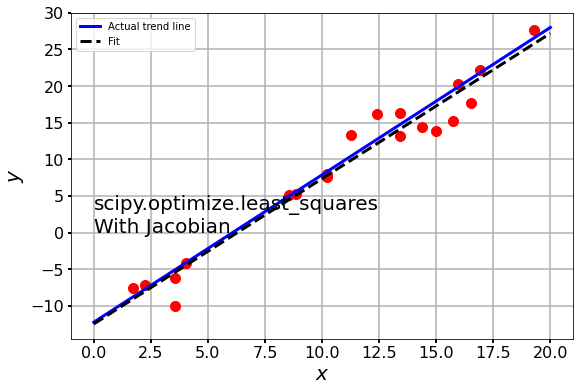

In [12]:
# ----------------------------------------------------------
# -- The residuals are calculated in this function.
# -- a        : Paramters that are being adjusted to fit
# -- args     : The data we are fitting 
# -- residual : THINK ABOUT IT: What shape is this array being returned?
# ----------------------------------------------------------
def f_model(a, *args) :
    xdata,ydata = args
    slope, intercept = a
    residual = (slope*xdata + intercept - ydata)
    return residual
# ----------------------------------------------------------
# -- The Jacobian of the residuals r with respect to the parameters a.
# -- a        : Paramters that are being adjusted to fit
# -- args     : The data we are fitting
# -- There are two parameters, and n data, so J is nx2  after transposeing.
# ----------------------------------------------------------    
def J_model(a, *args) :
    xdata,ydata = args
    slope,intercept = a
    J0 = xdata
    J1 = numpy.ones((xdata.size))
    return numpy.array([J0,J1]).T
# ----------------------------------------------------------    

# ----------------------------------------------------------    
# -- Use scipy.optimize.least_squares with your favorite method.
# -- scipy.optimize.least_squares returns not only the fit parameters,
# -- but also the residual's Jacobian at the last step! 
initial_guess = numpy.array([1.9,-5.1])
res = scipy.optimize.least_squares(f_model, 
                                   initial_guess,
                                   method='lm', # different methods available here
                                   jac=J_model, # or '3-point'
                                   args=(x,y))
hessian = numpy.dot(res.jac.T, res.jac)
covariance = numpy.abs(numpy.linalg.inv(hessian))
var = numpy.sqrt(numpy.diagonal(covariance))
# -- REPORT IT!
print("scipy.optimize.least_squares : ")
print(f"Success                      : {res.success}")
print(f"Message                      : {res.message}")
print(f"The fit slope is             : {res.x[0]:3.4f}+/-{var[0]:3.4f}")
print(f"The fit intercept is         : {res.x[1]:3.4f}+/-{var[1]:3.4f}")
print("\n")
# -- PLOT IT!
yplot  = res.x[0]*xplot+res.x[1]
plot.figure(figsize=(9,6))
plot.tick_params(axis='both', which='major', labelsize=16, labelcolor="black", width=2)
plot.xlabel(r"$x$", fontsize=20)
plot.ylabel(r"$y$", fontsize=20)
plot.plot(x,     y,     'r.',markersize=20)
plot.plot(xplot, ytrue, 'b-',linewidth=3, label="Actual trend line")
plot.plot(xplot, yplot, 'k--',linewidth=3, label="Fit")
plot.grid(True,linewidth=1.5,axis="both")
plot.annotate('scipy.optimize.least_squares\nWith Jacobian', xy=(0,0), xytext=(0,0),fontsize=20)
plot.legend()
plot.show()
plot.close()

#### Example 3 - scipy.optimize.curve_fit

Non-linear least squares with [`scipy.optimize.curve_fit`][1].

Becasue residuals in normal non-linear least squares are always defined the same, and because we can approximate the Jacobian by numerical differentiation, it would be easiest to only provide the model function $f(x;\vec{a})$, and let the python function `scipy.optimize.curve_fit` take care of the rest.

[1]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

scipy.optimize.curve_fit : 
The fit slope is             : 1.9821+/-0.0989
The fit intercept is         : -12.4434+/-1.1940




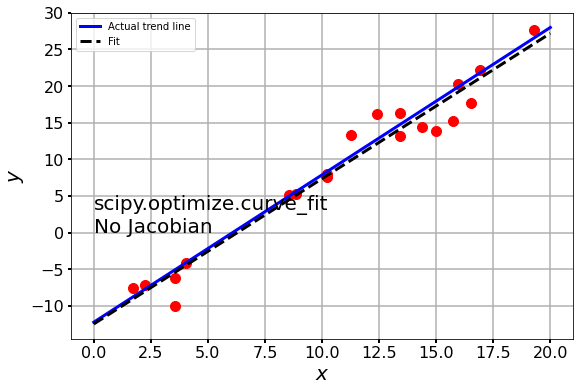

In [13]:
# ----------------------------------------------------------
# -- The model function is calculated here.
# -- This function is more like how we are used to writing functions: f(x;a)
# -- xdata    : The independant data array
# -- args     : Paramters that are being adjusted to fit
# -- residual : THINK ABOUT IT: What shape is this array being returned? Do we care?
# ----------------------------------------------------------
def f_model(xdata, *args) :
    slope , intercept = args
    f = (slope * xdata + intercept)
    return f

# ----------------------------------------------------------
# -- scipy.optimize.curve_fit returns the covariance matrix to us!
# --
initial_guess = numpy.array([1.9,-5.1])
res = scipy.optimize.curve_fit(f_model,x,y,initial_guess)
par = res[0]
var = numpy.sqrt(numpy.diag(res[1]))

print("scipy.optimize.curve_fit : ")
print(f"The fit slope is             : {par[0]:3.4f}+/-{var[0]:3.4f}")
print(f"The fit intercept is         : {par[1]:3.4f}+/-{var[1]:3.4f}")
print("\n")
# -- PLOT IT!
yplot  = f_model(xplot,*(par[0],par[1]))
plot.figure(figsize=(9,6))
plot.tick_params(axis='both', which='major', labelsize=16, labelcolor="black", width=2)
plot.xlabel(r"$x$", fontsize=20)
plot.ylabel(r"$y$", fontsize=20)
plot.plot(x,     y,     'r.',markersize=20)
plot.plot(xplot, ytrue, 'b-',linewidth=3, label="Actual trend line")
plot.plot(xplot, yplot, 'k--',linewidth=3, label="Fit")
plot.grid(True,linewidth=1.5,axis="both")
plot.annotate('scipy.optimize.curve_fit\nNo Jacobian', xy=(0,0), xytext=(0,0),fontsize=20)
plot.legend()
plot.show()
plot.close()

#### Example 4 - scipy.stats.linregress

Linear regression with [`scipy.stats.linregress`][1].

[1]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

LinregressResult(slope=1.982073927705637, intercept=-12.443417550369947, rvalue=0.978327518932368, pvalue=9.26156248378176e-14, stderr=0.09887869790149828, intercept_stderr=1.193960425594093)
scipy.stats.linregress       : 
R-value                      :  0.978327518932368
The fit slope is             : 1.9821+/-0.0989
The fit intercept is         : -12.4434+/-1.1940




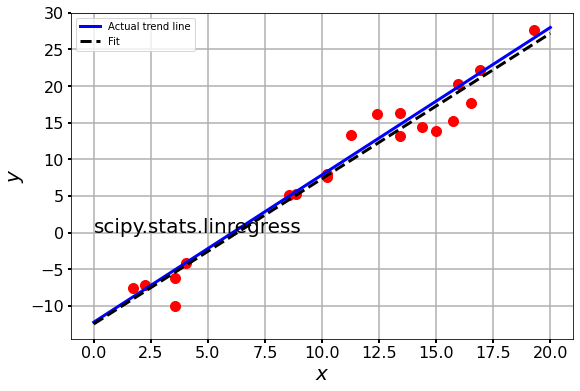

In [14]:
res = scipy.stats.linregress(x, y)
print(res)
print("scipy.stats.linregress       : ")
print("R-value                      : ", res.rvalue)
print("The fit slope is             : {0:3.4f}+/-{1:3.4f}".format(res.slope,res.stderr))
print("The fit intercept is         : {0:3.4f}+/-{1:3.4f}".format(res.intercept,res.intercept_stderr))
print("\n")

yplot  = res.slope*xplot+res.intercept
plot.figure(figsize=(9,6))
plot.tick_params(axis='both', which='major', labelsize=16, labelcolor="black", width=2)
plot.xlabel(r"$x$", fontsize=20)
plot.ylabel(r"$y$", fontsize=20)
plot.plot(x,     y,     'r.',markersize=20)
plot.plot(xplot, ytrue, 'b-',linewidth=3, label="Actual trend line")
plot.plot(xplot, yplot, 'k--',linewidth=3, label="Fit")
plot.grid(True,linewidth=1.5,axis="both")
plot.annotate('scipy.stats.linregress', xy=(0,0), xytext=(0,0),fontsize=20)
plot.legend()
plot.show()
plot.close()

#### Example 5 - sklearn.linear_model.LinearRegression

Linear regression by machine learning and [`sklearn.linear_model.LinearRegression`][1]

[1]: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

0.9571247343003633 [[1.98207393]] [-12.44341755]


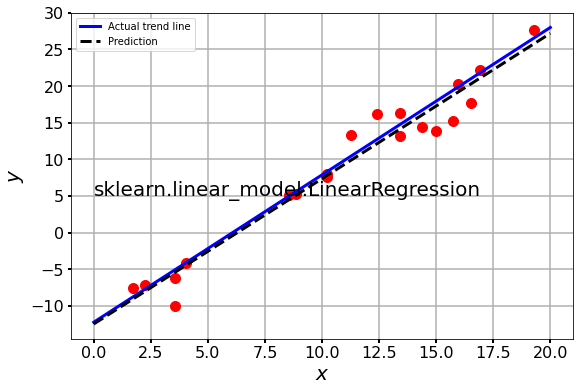

In [15]:
import sklearn.linear_model

x = x.reshape((x.size,1))
y = y.reshape((y.size,1))

model = sklearn.linear_model.LinearRegression()
res = model.fit(x, y)
print(res.score(x,y),res.coef_,res.intercept_)

yplot = model.predict(xplot[:, numpy.newaxis])

plot.figure(figsize=(9,6))
plot.tick_params(axis='both', which='major', labelsize=16, labelcolor="black", width=2)
plot.xlabel(r"$x$", fontsize=20)
plot.ylabel(r"$y$", fontsize=20)
plot.plot(x,     y,     'r.',markersize=20)
plot.plot(xplot, ytrue, 'b-',linewidth=3,label="Actual trend line")
plot.plot(xplot, yplot, 'k--',linewidth=3,label="Prediction")
plot.grid(True,linewidth=1.5,axis="both")
plot.annotate('sklearn.linear_model.LinearRegression', xy=(0,5), xytext=(0,5),fontsize=20)
plot.legend()
plot.show()
plot.close()